In [66]:
#!pip install imbalanced-learn

In [67]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('Fraud.csv')

In [69]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [70]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [71]:
len(df) # checking length of the dataframe

6362620

In [72]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [73]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

**Lets plot countplot for the column "type" of transaction**

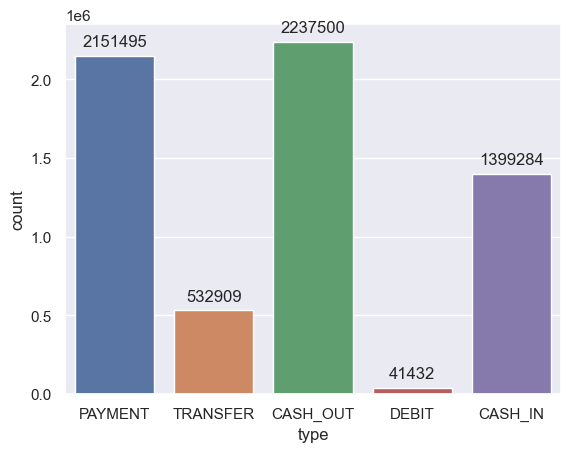

In [74]:
sns.set(style="darkgrid")

plot = sns.countplot(data=df, x='type')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

In [75]:
df['isFraud'].value_counts() 

0    6354407
1       8213
Name: isFraud, dtype: int64

**We can see that our target variable is highly imbalanced**

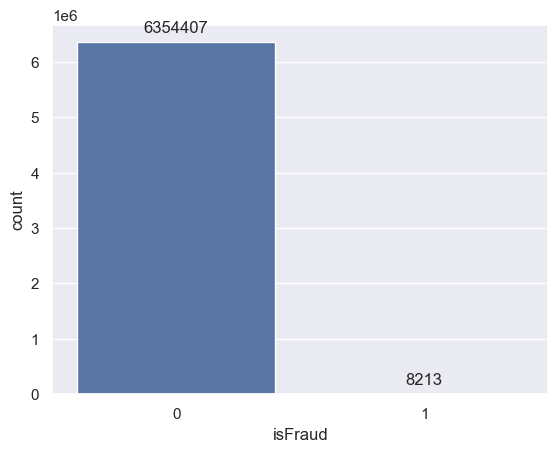

In [76]:
sns.set(style="darkgrid")

plot = sns.countplot(data=df, x='isFraud')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

**Finding correlation between different features of data**

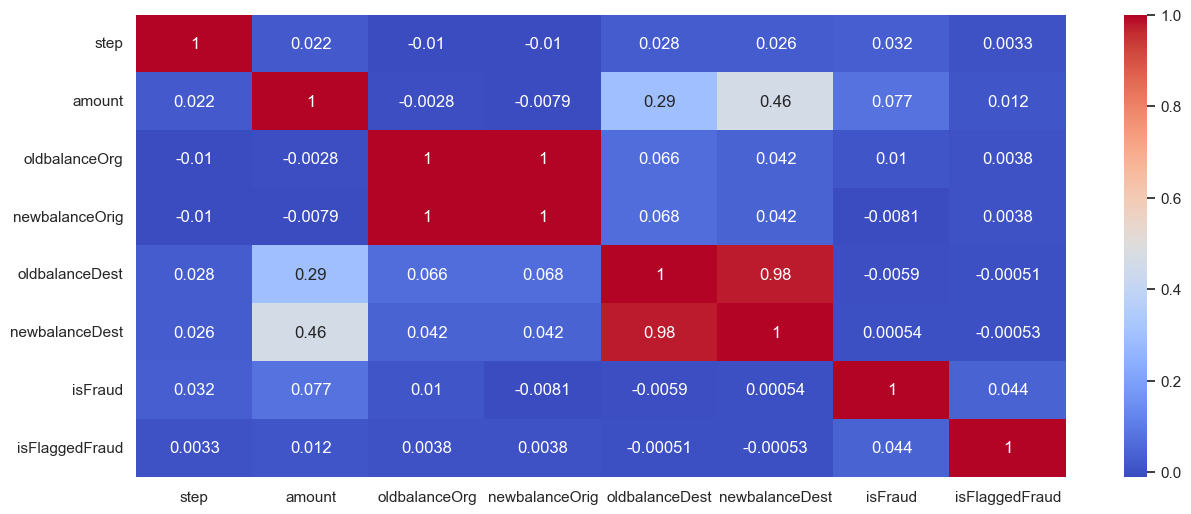

In [77]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)
plt.show()

In [78]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


**Feature engineering -- we will add new column in the dataframe that will show that the transaction is fraud if the amount >=100000**

In [79]:
df['above_100k'] = df['amount'] >= 100000
df['above_100k'] = df.above_100k.map({False:0, True:1})

**"is FlaggedFraud" column gives low score on mutual_info_score so it is better to drop that column**

In [80]:
from sklearn.metrics.cluster import mutual_info_score
mutual_info_score(df.type,df.isFlaggedFraud)

6.2360690356933125e-06

In [81]:
df = df.drop('isFlaggedFraud',axis=1)

**split the 'nameOrig' and 'nameDest' column at the first position at it has information for C which is for Customer and M which is for Merchant**

In [82]:
df['nameOrig_1'] = df['nameOrig'].str[0]
df['nameOrig_2'] = df['nameOrig'].str[1:]

In [83]:
df['namedest_1'] = df['nameDest'].str[0]
df['namedest_2'] = df['nameDest'].str[1:]

In [84]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,above_100k,nameOrig_1,nameOrig_2,namedest_1,namedest_2
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,C,1231006815,M,1979787155
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,C,1666544295,M,2044282225


In [85]:
df['namedest_1'].value_counts()

C    4211125
M    2151495
Name: namedest_1, dtype: int64

In [86]:
df=df.drop(['nameDest','nameOrig','nameOrig_2','namedest_2'],axis=1) # dropping unnecessary columns

In [87]:
one_hot_encoded = pd.get_dummies(df[['type','nameOrig_1','namedest_1']])

In [88]:
df = pd.concat([df, one_hot_encoded], axis=1)

In [89]:
df.head(2)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,above_100k,nameOrig_1,namedest_1,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_1_C,namedest_1_C,namedest_1_M
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,C,M,0,0,0,1,0,1,0,1
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,C,M,0,0,0,1,0,1,0,1


In [90]:
df = df.drop(['type','nameOrig_1','namedest_1','type_TRANSFER','namedest_1_C'],axis=1)

In [91]:
df.head(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,above_100k,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,nameOrig_1_C,namedest_1_M
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,1,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,1,1


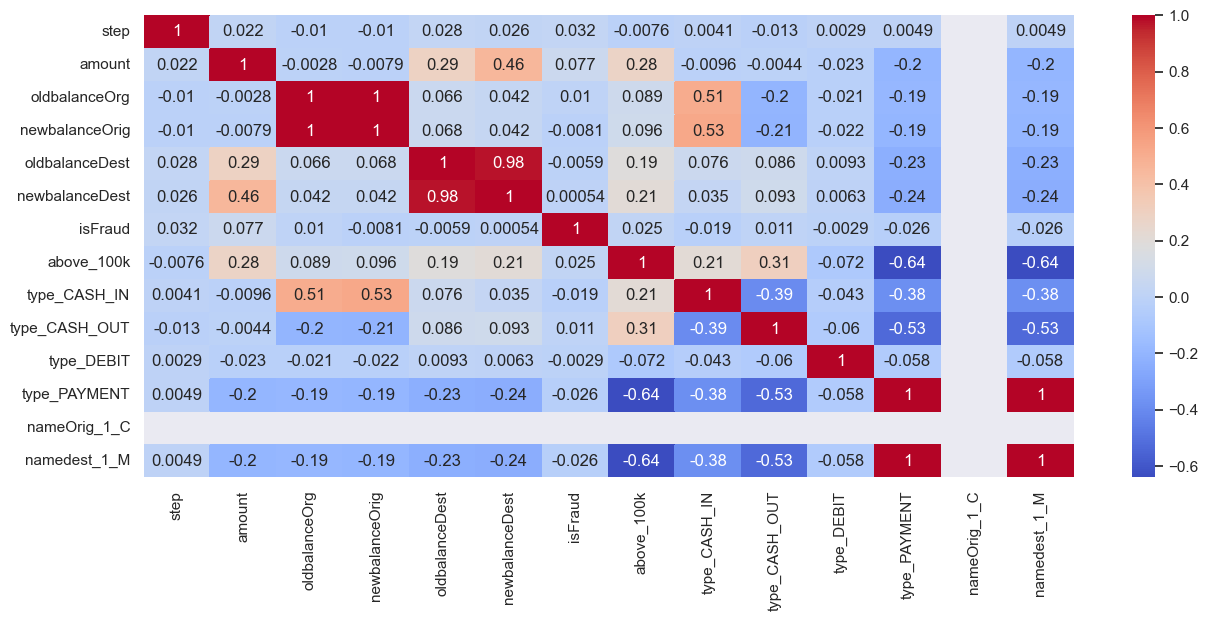

In [92]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Now as our data does not follow gaussian distribution, we can use normalization to scale down the selected columns**

In [93]:
df['amount'] = (df['amount'] - df['amount'].min()) / (df['amount'].max() -df['amount'].min())
df['oldbalanceOrg'] = (df['oldbalanceOrg'] - df['oldbalanceOrg'].min()) / (df['oldbalanceOrg'].max() -df['oldbalanceOrg'].min())
df['newbalanceOrig'] = (df['newbalanceOrig'] - df['newbalanceOrig'].min()) / (df['newbalanceOrig'].max() -df['newbalanceOrig'].min())
df['oldbalanceDest'] = (df['oldbalanceDest'] - df['oldbalanceDest'].min()) / (df['oldbalanceDest'].max() -df['oldbalanceDest'].min())
df['newbalanceDest'] = (df['newbalanceDest'] - df['newbalanceDest'].min()) / (df['newbalanceDest'].max() -df['newbalanceDest'].min())

In [94]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,above_100k,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,nameOrig_1_C,namedest_1_M
0,1,0.000106,0.002855,0.003233,0.000000,0.0,0,0,0,0,0,1,1,1
1,1,0.000020,0.000357,0.000391,0.000000,0.0,0,0,0,0,0,1,1,1
2,1,0.000002,0.000003,0.000000,0.000000,0.0,1,0,0,0,0,0,1,0
3,1,0.000002,0.000003,0.000000,0.000059,0.0,1,0,0,1,0,0,1,0
4,1,0.000126,0.000697,0.000603,0.000000,0.0,0,0,0,0,0,1,1,1


**Using Random Forest Classifier algorithm for our dataset**

In [95]:
X = df.drop('isFraud',axis=1)
y = df['isFraud']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
X_train.shape

(4262955, 13)

In [99]:
y_train.shape

(4262955,)

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rfc = RandomForestClassifier()

In [102]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [104]:
predictions = rfc.predict(X_test)

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.98      0.77      0.86      2666

    accuracy                           1.00   2099665
   macro avg       0.99      0.89      0.93   2099665
weighted avg       1.00      1.00      1.00   2099665



In [107]:
print(confusion_matrix(y_test,predictions))

[[2096962      37]
 [    612    2054]]


**As we can see, with Random forest classifier we got very good results. But as mentioned earlier as our dataset is highly imbalanced, we use SMOTE technique to balance the dataset**

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
sm = SMOTE(sampling_strategy='minority')
x_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [110]:
x_train_sm.shape

(8514816, 13)

In [111]:
rfc_1 = RandomForestClassifier()

In [112]:
rfc_1.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [113]:
pred = rfc_1.predict(X_test)

In [114]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.54      0.96      0.69      2666

    accuracy                           1.00   2099665
   macro avg       0.77      0.98      0.84   2099665
weighted avg       1.00      1.00      1.00   2099665



In [115]:
print(confusion_matrix(y_test,pred))

[[2094815    2184]
 [    112    2554]]


**We will use undersampling to balance the target column**

In [116]:
print(confusion_matrix(y_test,predictions))

[[2096962      37]
 [    612    2054]]


In [117]:
# Using undersampling
# Class count
count_class_0, count_class_1 = df.isFraud.value_counts()

# Divide by class
df_class_0 = df[df['isFraud'] == 0]
df_class_1 = df[df['isFraud'] == 1]

In [118]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.isFraud.value_counts())

Random under-sampling:
0    8213
1    8213
Name: isFraud, dtype: int64


**With the new random-sampled data, we will again use Random forest Classifier.**

In [119]:
X = df_test_under.drop('isFraud',axis='columns')
y = df_test_under['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rfc_2 = RandomForestClassifier()

In [122]:
rfc_2.fit(X_train,y_train)

RandomForestClassifier()

In [123]:
predict = rfc_2.predict(X_test)

In [124]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2464
           1       0.99      1.00      0.99      2464

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



In [125]:
print(confusion_matrix(y_test,predict))

[[2431   33]
 [   5 2459]]


**We got very good results even when we used Random forest Classifer without balancing the dataset. But It is also important to balance the dataset so we used 2 methods with are SMOTE and under_sampling. I will also save the model for all the 3 different methods below.**

In [126]:
import pickle

# saving our first model as rfc which was just random forest classifier

with open('rfc.pkl', 'wb') as f: 
    pickle.dump(rfc, f)

In [127]:
# saving our second model as rfc_1 which was random forest classifier after implementing SMOTE for our dataset

with open('rfc_1.pkl', 'wb') as g:
    pickle.dump(rfc_1, g)

In [128]:
# saving our second model as rfc_2 which was random forest classifier after implementing undersampling for our dataset 

with open('rfc_2.pkl', 'wb') as h:
    pickle.dump(rfc_2, h)

**Answering the assignment questions**

**1) Data cleaning including missing values, outliers and multi-collinearity**

**For data cleaning, I approached with finding missing values, then checked if there are outliers. Even though it is good practice to eliminate outliers, but as we know that for the Random forest algorithm, outliers doesn't affect the data, so I did not try to remove outliers. Then for multi-collinearity, I plotted a heatmap for all features and following the heatmap, though I did not find features that are highly correlated to each other, we can always remove them.**

**2) Describe your fraud detection model in elaboration**

**I preferred to use supervised learning algorithm like Random forest classifier technique to classify transactions as fraudulent or non-fraudulent because the algorithm takes care of outliers and is easy to train. Also as I said that the data is highly imbalanced, so using techniques to balance the data like SMOTE and Undersampling gave me better f1 score and precision.**

**3) How did you select variables to be included in the model?**

**I selected variables that are correlated with the target column (isFraud column) and their importance in detecting if the transaction is fraudent or not. Variables such as type, amount, if the transaction is from customer or merchant and the initial and final balances of both the customer and the recipient would be important for the model.**

**4) Variables such as type, amount, and the initial and final balances of both the customer and the recipient would be important for the model.**

**I would use metrics such as confusion matrix, precision, recall, F1 score to evaluate the performance of the model. I would also use other ensemble techniques like cross-validation or boosting techniques to ensure that the model is not overfitting to the training data.**

**5) What are the key factors that predict fraudulent customer?**

**The key factors that predict fraudulent customers would likely include high transaction amounts (more than 100k in our model), sudden changes in account balances and transactions involving multiple parties.**

**6) Do these factors make sense? If yes, How? If not, How not?**

**These factors make sense and are important as they are important to determining of suspicious or unusual activity that may be indicative of fraud. High transaction amounts and sudden changes in account balances may be indicative of an attempt to steal funds, while transactions involving multiple parties may be indicative of money laundering or other illegal activities, also type of transaction can also help to find out what type of payment method has most fraudent transaction involved.**

**7) What kind of prevention should be adopted while company update its infrastructure?**

**To prevent fraud, the company could implement measures such as transaction monitoring, account monitoring, setting up bank alert and security system, knowing information about customers and two-factor authentication. Additionally, the company could also train its employees to identify suspicious activity at its root and report it.**


**8) Assuming these actions have been implemented, how would you determine if they work?**

**To determine if the implemented actions are effective, the company could track the number of fraudulent transactions before and after the implementation of these measures. Additionally, the company could also conduct regular audits and assessments to identify any areas where the system may be vulnerable to fraud.**